# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-4-7d30c1d1d44e>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [5]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [6]:
# Q2

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [7]:
#Q2
missing_value = df.isnull().sum()
missing_value_percent = (missing_value / len(df)) * 100

missing_data_df = pd.DataFrame({'missing_num': missing_value, 'missing_%': missing_value_percent})

# Remove rows where there is no missing value, sort dataFrame by percentage
missing_data_df = missing_data_df[missing_data_df['missing_num'] > 0].sort_values(by='missing_%', ascending=False)

missing_data_df


,missing_num,missing_%
jurisdiction_names,50781,99.970470
license,50759,99.927160
square_feet,50407,99.234192
monthly_price,46119,90.792582
weekly_price,45411,89.398772
host_response_rate,19006,37.416332
host_response_time,19006,37.416332
security_deposit,17325,34.107016
host_acceptance_rate,14015,27.590755
review_scores_value,11482,22.604142


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

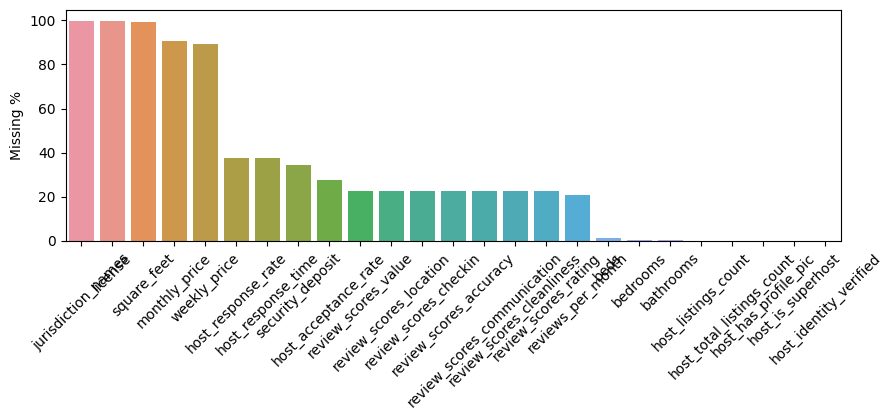

In [8]:
# Q3

plt.figure(figsize=(10, 3))
plt.grid(False)

sns.barplot(x=missing_data_df.index, y=missing_data_df['missing_%'])

sns.set(style="whitegrid", color_codes=True)

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.gca().set_facecolor('white')

plt.xticks(rotation=45)
plt.ylabel('Missing %')
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [9]:
# Q4

beds_missing = df[df['beds'].isnull()]

beds_missing.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [10]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [11]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

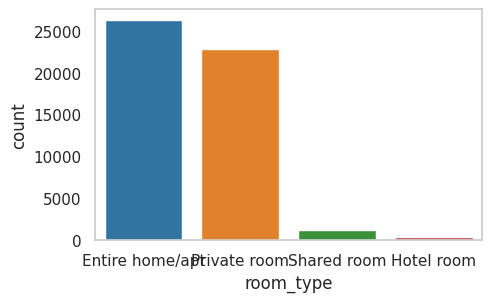

In [13]:
# Q5
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(5, 3))
plt.grid(False)

sns.countplot(data=df, x='room_type', order=room_type_counts.index, palette='tab10')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

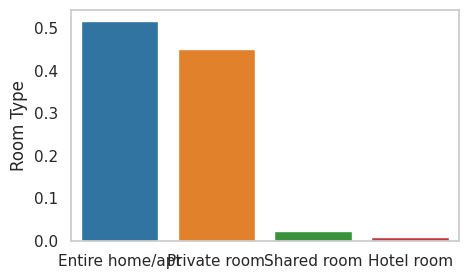

In [14]:
# Q6
room_type_ratios = room_type_counts / room_type_counts.sum()

plt.figure(figsize=(5, 3))
plt.grid(False)

sns.barplot(x=room_type_ratios.index, y=room_type_ratios.values, palette='tab10')
plt.ylabel('Room Type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

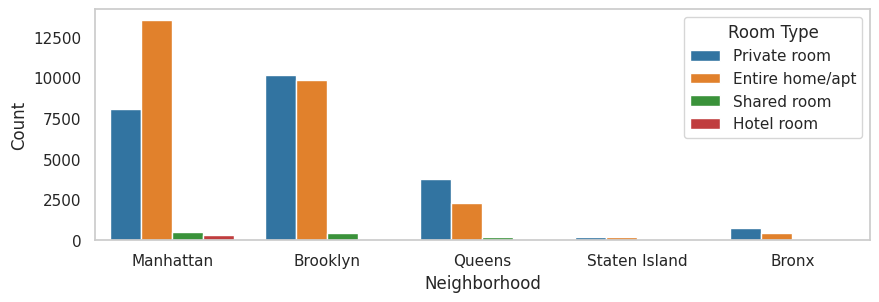

In [15]:
# Q7
plt.figure(figsize=(10, 3))
plt.grid(False)

sns.countplot(data=df, x='neighborhood', hue='room_type', palette='tab10')

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<ipython-input-16-efb326ddf8b9>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='neighborhood', y='price', palette='Set1')


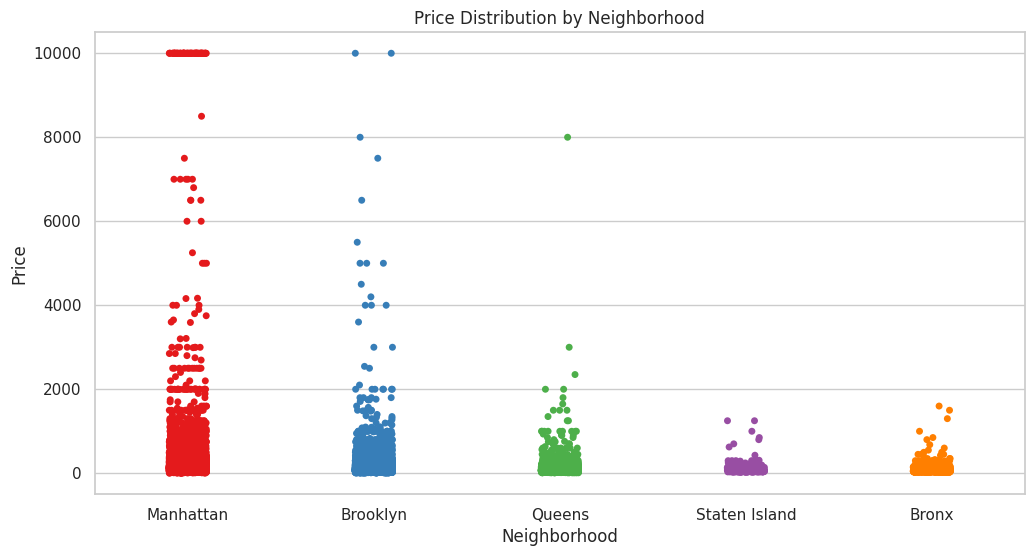

In [16]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='neighborhood', y='price', palette='Set1')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [17]:
# Q9

# Manhattan 지역에 비교적 방의 가격이 높은 곳이 많다.
# 왜냐하면 방의 종류 중에서 Entire home이 private room, shared room, hotel room에 비해
# 더 넓을 것이고 따라서 더 비싼 경우가 많을 것이기 때문이다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

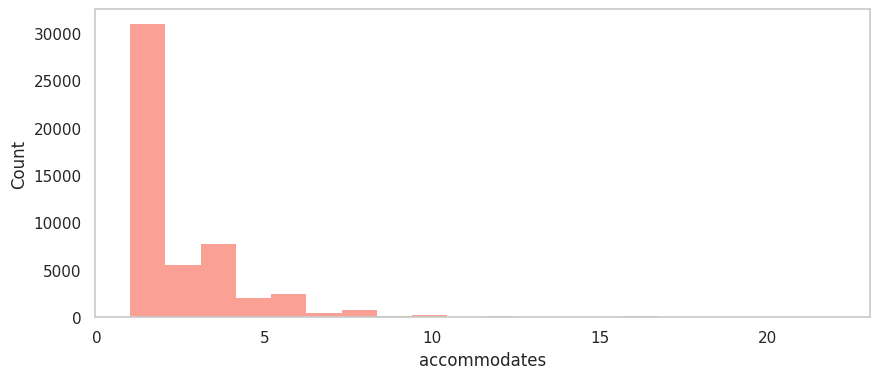

In [18]:
# Q10

plt.figure(figsize=(10, 4))
plt.grid(False)

sns.histplot(df['accommodates'], bins=20, kde=False, color='salmon', edgecolor='none')

plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

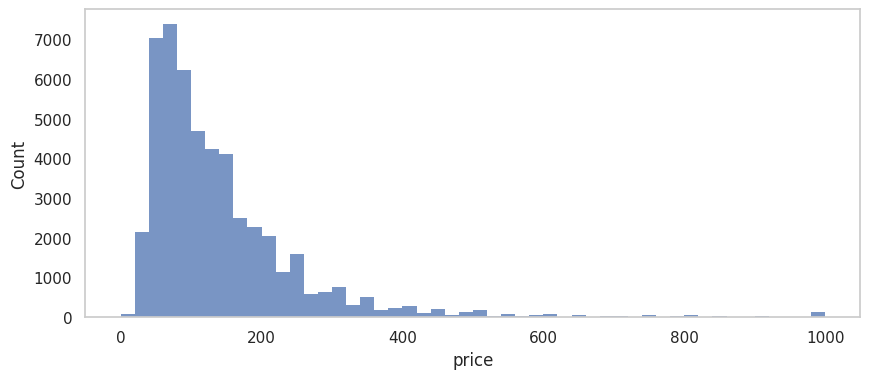

In [19]:
# Q11

plt.figure(figsize=(10, 4))
plt.grid(False)

sns.histplot(df[df['price'] <= 1000]['price'], bins=50, edgecolor='none')

plt.show()

**굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [83]:
df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)

- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [84]:
#Q12
missing_percentage = df.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 25].index
df = df.drop(columns=columns_to_drop)

rows_to_drop = missing_percentage[(missing_percentage > 10) & (missing_percentage <= 25)].index
df.dropna(subset=rows_to_drop, inplace=True)

columns_to_impute = missing_percentage[missing_percentage <= 10].index
for column in columns_to_impute:
    if df[column].dtype in ['float64', 'int64']:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39291 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39290 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39291 non-null  object 
 5   host_has_profile_pic              39290 non-null  object 
 6   host_identity_verified            39290 non-null  object 
 7   neighborhood                      39291 non-null  object 
 8   latitude                          39291 non-null  float64
 9   longitude                         39291 non-null  float64
 10  is_location_exact                 39291 non-null  object 
 11  property_type                     39291 non-null  object 
 12  room

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [ ]:
!pip install mrmr_selection


In [109]:
#Q13-1) drop columns that are not needed

# object type인 column에서 호스트에 대한 정보, 이용자에게 필요한 정보 등 필요 없거나
# amenties와 같이 one-hot encoding을 했을 때 너무 많은 양의 column이 생기는 column을 제거합니다.

# mRMR을 진행하기 전에 type이 object인 column에 대해서 one-hot encoding을 진행해줘야 합니다.
# 이 때 필요없는 정보를 one-hot encoding하는 것은 비효율적이기 때문에 mRMR 진행전에 미리 제거해줌으로써 mRMR이 더 효율적으로 진행할 수 있게 합니다.
# amenities 의 경우 one-hot encoding을 진행하면 3만개 이상의 column이 생겨서 제거합니다.

not_needed_columns = ['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
                      'host_identity_verified', 'is_location_exact', 'extra_people',
                      'has_availability', 'requires_license', 'instant_bookable',
                      'is_business_travel_ready', 'cancellation_policy',
                      'require_guest_profile_picture', 'require_guest_phone_verification',
                      'amenities']

dropped_df = df.drop(columns=not_needed_columns)

dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39291 entries, 1 to 50694
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39291 non-null  int64  
 1   host_listings_count          39291 non-null  float64
 2   host_total_listings_count    39291 non-null  float64
 3   neighborhood                 39291 non-null  object 
 4   latitude                     39291 non-null  float64
 5   longitude                    39291 non-null  float64
 6   property_type                39291 non-null  object 
 7   room_type                    39291 non-null  object 
 8   accommodates                 39291 non-null  int64  
 9   bathrooms                    39291 non-null  float64
 10  bedrooms                     39291 non-null  float64
 11  beds                         39291 non-null  float64
 12  bed_type                     39291 non-null  object 
 13  price           

In [110]:
#Q13-2)mRMR
# host_listings_count, host_total_listings_count와 같이 매우 중복성이 큰 column을 제거하고
# latitude, longitude와 같이 연관성이 크지 않은 정보도 제거합니다.
# 이를 통해 연관성을 최대화합니다.

from mrmr import mrmr_classif

train_y = dropped_df['price']
train_X = dropped_df.drop('price', axis=1)


non_numeric_columns = train_X.select_dtypes(include=['object']).columns

# Apply one-hot encoding
train_X = pd.get_dummies(train_X, columns=non_numeric_columns)

train_X.info()

selected_features = mrmr_classif(X=train_X, y=train_y, K=10)

train_X_selected = train_X[selected_features]

train_X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39291 entries, 1 to 50694
Data columns (total 74 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    39291 non-null  int64  
 1   host_listings_count                   39291 non-null  float64
 2   host_total_listings_count             39291 non-null  float64
 3   latitude                              39291 non-null  float64
 4   longitude                             39291 non-null  float64
 5   accommodates                          39291 non-null  int64  
 6   bathrooms                             39291 non-null  float64
 7   bedrooms                              39291 non-null  float64
 8   beds                                  39291 non-null  float64
 9   guests_included                       39291 non-null  int64  
 10  minimum_nights                        39291 non-null  int64  
 11  maximum_nights 

100%|██████████| 10/10 [00:02<00:00,  4.62it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39291 entries, 1 to 50694
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   room_type_Entire home/apt         39291 non-null  uint8  
 1   property_type_Houseboat           39291 non-null  uint8  
 2   property_type_Resort              39291 non-null  uint8  
 3   bathrooms                         39291 non-null  float64
 4   property_type_Guesthouse          39291 non-null  uint8  
 5   property_type_Timeshare           39291 non-null  uint8  
 6   property_type_Serviced apartment  39291 non-null  uint8  
 7   property_type_Cottage             39291 non-null  uint8  
 8   property_type_Boutique hotel      39291 non-null  uint8  
 9   property_type_Island              39291 non-null  uint8  
dtypes: float64(1), uint8(9)
memory usage: 959.3 KB


In [116]:
#Q13-3)PCA
# 20차원도 사람이 보기에는 꽤 큰 차원수이기 때문에 차원을 줄일 필요가 있습니다.
# 이때 PCA를 이용해서 데이터의 분산을 최대한 보존합니다.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 3

pca = PCA(n_components=n_components)
pca_X_train = pca.fit_transform(train_X_selected)
principalDf = pd.DataFrame(data = pca_X_train, columns = ['PC1', 'PC2', 'PC3'])

print(pca.explained_variance_ratio_)

print(principalDf)


[0.5770278  0.38775802 0.01507758]
            PC1       PC2       PC3
0      0.465817 -0.164621  0.000825
1      0.465817 -0.164621  0.000825
2      0.465817 -0.164621  0.000825
3     -0.532545 -0.109466 -0.013568
4     -0.532545 -0.109466 -0.013568
...         ...       ...       ...
39286 -0.532545 -0.109466 -0.013568
39287 -0.532545 -0.109466 -0.013568
39288 -0.532545 -0.109466 -0.013568
39289  0.493419  0.334613 -0.000892
39290  0.465817 -0.164621  0.000825

[39291 rows x 3 columns]


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
